In [1]:
# Dependencies
import requests
import json
from config import api_key
from citipy import citipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Create a Dataframe of 500 Random Cities

In [2]:
#Create a list of 500 random cities
coordinates = []
cities = []

# Create a set of random coordinates
latitude = np.random.uniform(low=-90, high=90, size=3000)
longitude = np.random.uniform(low=-180, high=180, size=3000)
coordinates = zip(latitude, longitude)

# Find the nearest city for each coordinate
for i in coordinates:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        if len(cities) < 1000:
            cities.append(city)

#There should be about 1000 cities in the list at this point. This way, 
    # as long as the Open Weather Map recognizes at least 50%, we'll get data for 500 cities
print(f"There are {len(cities)} cities in the list")

There are 964 cities in the list


In [3]:
country = []
city_name = []
city_id = []
latitude = []
longitude = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = base_url + "appid=" + api_key + "&units=imperial&q="


#Loop through the list of 550 random cities to store their details into the lists
for index, city in enumerate(cities): 
    
    if len(city_id) < 550:
        try:
            response = requests.get(query_url + city).json()
            id = response["id"]
            name = response["name"]
            print(f"Count: {index}, City Name: {name}")
            country.append(response["sys"]["country"])
            city_name.append(response["name"])
            city_id.append(response["id"])
            latitude.append(response["coord"]["lat"])
            longitude.append(response["coord"]["lon"])
            temp.append(response["main"]["temp"])
            humidity.append(response["main"]["humidity"])
            cloudiness.append(response["clouds"]["all"])
            wind_speed.append(response["wind"]["speed"])
        except(KeyError, IndexError):
            pass


Count: 1, City Name: Bonthe
Count: 2, City Name: Concarneau
Count: 4, City Name: Inongo
Count: 5, City Name: Ballina
Count: 6, City Name: Puerto Ayora
Count: 7, City Name: Hasaki
Count: 8, City Name: Bria
Count: 9, City Name: Pāvilosta
Count: 10, City Name: Topeka
Count: 11, City Name: Punta Arenas
Count: 12, City Name: Lavrentiya
Count: 13, City Name: Katsuura
Count: 15, City Name: Bathsheba
Count: 16, City Name: Maniitsoq
Count: 17, City Name: Rikitea
Count: 18, City Name: Husavik
Count: 19, City Name: Hermanus
Count: 20, City Name: Yenagoa
Count: 21, City Name: Tasiilaq
Count: 22, City Name: Ushuaia
Count: 23, City Name: Kupang
Count: 24, City Name: Pacific Grove
Count: 25, City Name: Yellowknife
Count: 26, City Name: Abéché
Count: 27, City Name: Huercal Overa
Count: 28, City Name: Viranşehir
Count: 29, City Name: Saskylakh
Count: 30, City Name: Ambulu
Count: 31, City Name: Quatre Cocos
Count: 32, City Name: Cham
Count: 33, City Name: Bandarbeyla
Count: 34, City Name: Upernavik
Coun

Count: 281, City Name: Ca Mau
Count: 282, City Name: Palauig
Count: 283, City Name: Okha
Count: 284, City Name: Klaksvík
Count: 285, City Name: Codrington
Count: 286, City Name: Gazojak
Count: 287, City Name: Dakar
Count: 288, City Name: Āsbe Teferī
Count: 289, City Name: Yar-Sale
Count: 290, City Name: Grindavik
Count: 291, City Name: Port Lincoln
Count: 292, City Name: Kiama
Count: 293, City Name: Yambio
Count: 294, City Name: Longyearbyen
Count: 296, City Name: Petropavlovsk-Kamchatskiy
Count: 297, City Name: Constitución
Count: 298, City Name: Tikhvin
Count: 299, City Name: Los Llanos de Aridane
Count: 300, City Name: Manoel Urbano
Count: 302, City Name: Nizhneangarsk
Count: 304, City Name: Luwuk
Count: 305, City Name: Raymond
Count: 306, City Name: East London
Count: 307, City Name: Vestmannaeyjar
Count: 308, City Name: Muros
Count: 309, City Name: Ossipee
Count: 310, City Name: Iisalmi
Count: 311, City Name: Along
Count: 313, City Name: Greensburg
Count: 314, City Name: Abalak
Co

Count: 559, City Name: Muroto-misakicho
Count: 560, City Name: Jutaí
Count: 561, City Name: Macamic
Count: 562, City Name: Soyo
Count: 563, City Name: Najrān
Count: 564, City Name: Beloostrov
Count: 565, City Name: Gemeente Barendrecht
Count: 566, City Name: Juegang
Count: 567, City Name: Madimba
Count: 568, City Name: Miyako
Count: 569, City Name: Musoma
Count: 570, City Name: Qui Nhon
Count: 571, City Name: Matara
Count: 572, City Name: Calabozo
Count: 575, City Name: Chumikan
Count: 577, City Name: Kamuli
Count: 578, City Name: Gornopravdinsk
Count: 579, City Name: Wschowa
Count: 580, City Name: Townsville
Count: 581, City Name: Akşehir
Count: 582, City Name: San Lazaro
Count: 583, City Name: Bacabal
Count: 584, City Name: Semey
Count: 585, City Name: Isangel
Count: 586, City Name: Caravelas
Count: 587, City Name: Maketu
Count: 588, City Name: Bubaque
Count: 589, City Name: Huanta
Count: 590, City Name: Barranca
Count: 591, City Name: Urucará
Count: 592, City Name: Puerto Baquerizo 

In [4]:
#Create a dataframe using the variables from the previous cell
weather_dict = {
    "City Name": city_name,
    "City ID": city_id,
    "Country": country,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temp (F)": temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind_speed
}
weather_data = pd.DataFrame(weather_dict)

#Save this dataframe to a CSV
weather_data.to_csv(r'weather_data.csv')

weather_data.head()

,City Name,City ID,Country,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Bonthe,2409914,SL,7.53,-12.51,79.30,80,100,14.29
1,Concarneau,3024035,FR,47.88,-3.92,67.95,88,75,10.29
2,Inongo,2315417,CD,-1.95,18.27,80.01,54,49,3.42
3,Ballina,2177069,AU,-28.87,153.57,60.49,88,90,12.75
4,Puerto Ayora,3652764,EC,-0.74,-90.35,68.00,94,100,7.00


In [5]:
# #This cell could be used to test whether any humidity values are invalid (over 100)
weather_data["Humidity (%)"].max()

# #Since no values are over 100, this step is not needed
# invalid_humidity = weather_data["Humidity (%)"] <= 100
# invalid_humidity = weather_data[invalid_humidity]
# invalid_humidity

100

## Scatter Plots

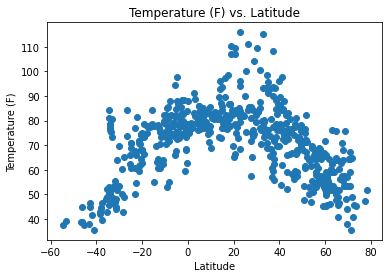

In [6]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Temp (F)']
plt.scatter(x_values,y_values)
plt.title('Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig("scatter_plot_images/scatter_plot_temperature_vs_latitude.png")

plt.show()

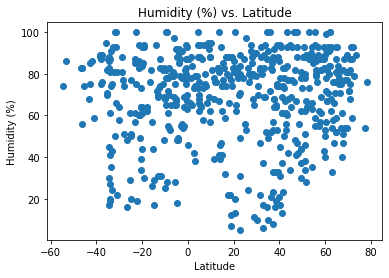

In [7]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Humidity (%)']
plt.scatter(x_values,y_values)
plt.title('Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("scatter_plot_images/scatter_plot_humidity_vs_latitude.png")

plt.show()

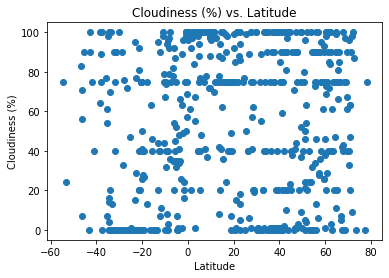

In [8]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness (%)']
plt.scatter(x_values,y_values)
plt.title('Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("scatter_plot_images/scatter_plot_cloudiness_vs_latitude.png")

plt.show()

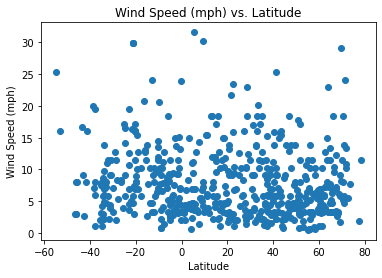

In [9]:
# Create a Scatter Plot for wind speed vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed (mph)']
plt.scatter(x_values,y_values)
plt.title('Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("scatter_plot_images/scatter_plot_windspeed_vs_latitude.png")

plt.show()

## Linear Regression

In [10]:
#Separate cities into northern hemisphere vs southern hemisphere

northern = weather_data["Latitude"] >= 0
southern = weather_data["Latitude"] < 0

northern_hem = weather_data[northern]
southern_hem = weather_data[southern]

### Temperature vs Latitude

The r-squared is: 0.4738553656580854


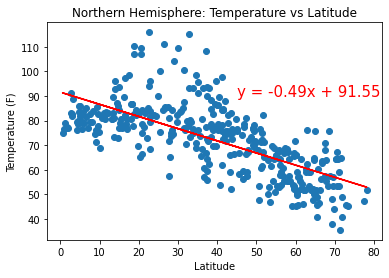

The r-squared is: 0.5675417500025526


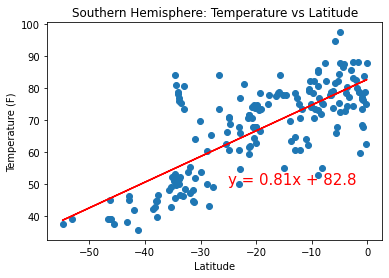

In [11]:
#Calculate linear regression on Temp vs Latitude
x_values = northern_hem["Latitude"]
y_values = northern_hem["Temp (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,90),fontsize=15,color="red")
plt.title("Northern Hemisphere: Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("scatter_plot_images/NH_temperature_vs_latitude.png")


plt.show()

x_values = southern_hem["Latitude"]
y_values = southern_hem["Temp (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.title("Southern Hemisphere: Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("scatter_plot_images/SH_temperature_vs_latitude.png")

plt.show()

Observations: 
As you get closer to the equator, temperature increaeses on average. 
For the southern hemisphere, temperature increases more rapidly as you move closer to the equator. 
In the southern hemisphere, for every degree of latitude you move closer to the equator, the temperature increases by .84 degrees Fahrenheit.

### Humidity (%) vs Latitude

The r-squared is: 0.0034714690906723147


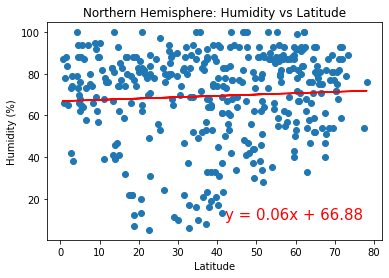

The r-squared is: 6.42338298246228e-05


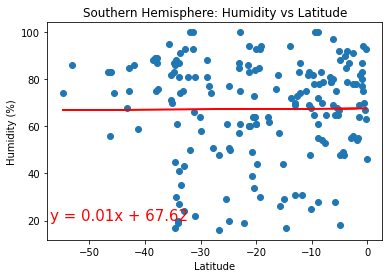

In [12]:
#Calculate linear regression on Humidity vs Latitude
x_values = northern_hem["Latitude"]
y_values = northern_hem["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,10),fontsize=15,color="red")
plt.title("Northern Hemisphere: Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("scatter_plot_images/NH_humidity_vs_latitude.png")

plt.show()

x_values = southern_hem["Latitude"]
y_values = southern_hem["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,20),fontsize=15,color="red")
plt.title("Southern Hemisphere: Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("scatter_plot_images/SH_humidity_vs_latitude.png")


plt.show()

Observations: 
There is almost no correlation between Humidity and Latitude.
For cities that are far away from the equator, it's rare to experience very low humidity

### Cloudiness (%) vs Latitude

The r-squared is: 0.00992349911671518


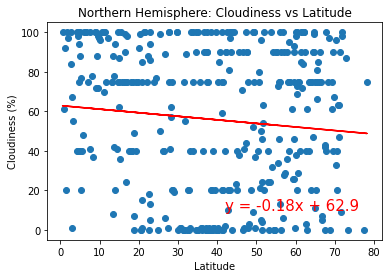

The r-squared is: 0.014627151372336748


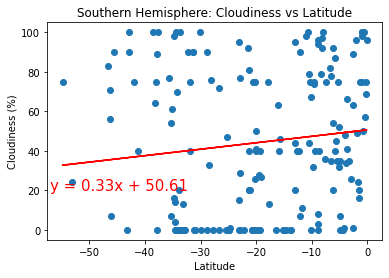

In [13]:
#Calculate linear regression on Cloudiness vs Latitude
x_values = northern_hem["Latitude"]
y_values = northern_hem["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,10),fontsize=15,color="red")
plt.title("Northern Hemisphere: Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("scatter_plot_images/NH_cloudiness_vs_latitude.png")


plt.show()

x_values = southern_hem["Latitude"]
y_values = southern_hem["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,20),fontsize=15,color="red")
plt.title("Southern Hemisphere: Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("scatter_plot_images/SH_cloudiness_vs_latitude.png")


plt.show()

Observations: There is a slight correlation between Latitude and cloudiness. As you move closer to the equator, it becomes slightly more cloudy.

### Wind Speed (mph) vs Latitude

The r-squared is: 0.0022090017573642693


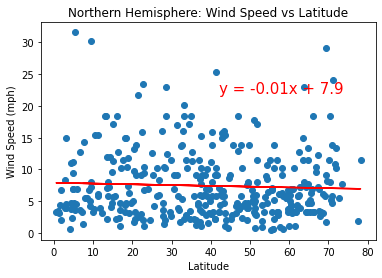

The r-squared is: 0.002066803344841978


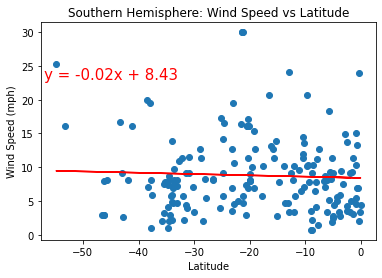

In [14]:
#Calculate linear regression on wind speed vs Latitude
x_values = northern_hem["Latitude"]
y_values = northern_hem["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,22),fontsize=15,color="red")
plt.title("Northern Hemisphere: Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("scatter_plot_images/NH_windspeed_vs_latitude.png")


plt.show()

x_values = southern_hem["Latitude"]
y_values = southern_hem["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,23),fontsize=15,color="red")
plt.title("Southern Hemisphere: Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("scatter_plot_images/SH_windspeed_vs_latitude.png")

plt.show()



Observations: There is a very weak correlation between wind speed and latitude